# Analysis of Lending club loan dataset

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

#### Plotting with seaborn

In [2]:
import seaborn as sns
sns.set_style("white")
plt.rcParams["figure.figsize"] = (12, 6)

## Exploration of the data

### Data dictionary 

In [3]:
df_dict = pd.read_excel('../data/LCDataDictionary.xlsx')

In [4]:
df_dict.shape

(80, 2)

#### Set formatting options for pandas

In [5]:
pd.set_option('display.max_colwidth', -1)

In [6]:
pd.options.display.max_rows = 100
pd.set_option('precision', 5)

#### What's in the data?

In [7]:
df_dict

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


#### Thoughts

If I am trying to predict interest rate that the loan will be offered - then I need to be careful with only including the data that would be there at the acquisition stage. There should be no data that is date after the issue_d at the very least



### Exploring the data

In [8]:
df_loan = pd.read_csv('../data/loan.csv',low_memory=False)

In [54]:
df_loan.shape

(887379, 74)

In [55]:
df_loan.columns.sort_values()

Index(['acc_now_delinq', 'addr_state', 'all_util', 'annual_inc',
       'annual_inc_joint', 'application_type', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'desc', 'dti', 'dti_joint',
       'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util',
       'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'max_bal_bc', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record',
       'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc', 'open_acc_6m',
       'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m',
       'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade'

In [45]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 35 columns):
id                           887379 non-null int64
member_id                    887379 non-null int64
term                         887379 non-null object
int_rate                     887379 non-null float64
installment                  887379 non-null float64
grade                        887379 non-null object
emp_title                    835922 non-null object
emp_length                   887379 non-null object
home_ownership               887379 non-null object
annual_inc                   887375 non-null float64
verification_status          887379 non-null object
issue_d                      887379 non-null object
url                          887379 non-null object
desc                         126029 non-null object
purpose                      887379 non-null object
title                        887228 non-null object
zip_code                     887379 non-null object
addr

#### Mismatch between data dictionary and loan file features?

In [57]:
df_dict[~df_dict['LoanStatNew'].isin(df_loan.columns)]

,LoanStatNew,Description
13,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
14,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
24,is_inc_v,"Indicates if income was verified by LC, not verified, or if the income source was verified"
27,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
28,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
71,total_rev_hi_lim,Total revolving high credit/credit limit
78,NaN,NaN
79,NaN,* Employer Title replaces Employer Name for all loans listed after 9/23/2013


Verified status joint is the same as verification status joint - let's rename this field

In [56]:
df_loan.rename(index=str, columns={"verification_status_joint":"verified_status_joint","total_rev_hi_lim":"total_rev_hi_lim"},inplace=True)

If I am looking to predict interest rates charged, then FICO ranges is probably quite important - but let's see what can be done in the absence of FICO

In [59]:
df_loan['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

#### 

In [58]:
df_loan['issue_d'].value_counts()

Oct-2015    48631
Jul-2015    45962
Dec-2015    44342
Oct-2014    38782
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Jul-2014    29306
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Nov-2014    25054
Feb-2015    23770
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Dec-2013    15020
Nov-2013    14676
Oct-2013    14114
Sep-2013    12987
Aug-2013    12674
Jul-2013    11910
Jun-2013    10899
Sep-2014    10606
May-2013    10350
Dec-2014    10307
Apr-2013    9419 
Mar-2013    8273 
Feb-2013    7561 
Jan-2013    6872 
Nov-2012    6382 
Oct-2012    6263 
Sep-2012    6087 
Dec-2012    6066 
Aug-2012    5419 
Jul-2012    4627 
Jun-2012    3817 
May-2012    3400 
Apr-2012    3230 
Mar-2012    2914 
Jan-2012    2602 
Feb-2012    2560 
Dec-2011    2267 
Nov-2011    2232 
            ...  
Jul-2011    1875 
Jun-2011    1835 
May-2011    1704 
Apr-2011    1563 
Mar-2011  

In [60]:
df_loan['last_credit_pull_d'].value_counts()

Jan-2016    730574
Dec-2015    19308 
Nov-2015    11490 
Oct-2015    10419 
Sep-2015    10087 
Jul-2015    8642  
Aug-2015    7987  
Jun-2015    7130  
Apr-2015    6160  
May-2015    5930  
Mar-2015    5775  
Jan-2015    5271  
Feb-2015    5017  
Dec-2014    3702  
Oct-2014    3358  
Nov-2014    3168  
Sep-2014    2961  
Aug-2014    2812  
Jul-2014    2773  
May-2014    2290  
Jun-2014    2236  
Mar-2014    2204  
Apr-2014    2191  
Feb-2014    1931  
Jan-2014    1793  
Feb-2013    1446  
Nov-2013    1412  
Dec-2013    1395  
Oct-2013    1273  
Sep-2013    1063  
Aug-2013    1048  
Mar-2013    1038  
Jul-2013    1020  
May-2013    997   
Jun-2013    853   
Apr-2013    836   
Nov-2012    576   
Dec-2012    576   
Sep-2012    525   
Oct-2012    515   
Aug-2012    505   
Feb-2012    420   
Mar-2012    402   
May-2012    388   
Jul-2012    384   
Jun-2012    376   
Apr-2012    360   
Mar-2011    335   
Aug-2011    305   
Jan-2012    286   
           ...    
Feb-2011    210   
Jun-2011    

Most of the credit pulls are after the issue date - will have to drop this column

### Initial thoughts

What is the problem that I am trying to solve here? I want to see if I can predict the interest rate a customer will get at Lending club with only data available at the applicatoin stage. 

Lending club already has information on their rates here - https://www.lendingclub.com/public/rates-and-fees.action 

On the website if you go through the process, they ask you for your credit score, amount of loan and what you want this for. 

Then they ask you for your address etc and do a soft credit pull. The FICO score is a big part of the interest rate. 

Can I reverse engineer the interest rate/loan grade without the FICO score? There are other datasets out there that contain the FICO score with the same lending club data

#### What are the features that are available at application stage? 

From list of features:

|Feature           |Available?|Notes                                          |
|------------------|----------|-----------------------------------------------|
| 'addr_state'     | Y        |                                               |
|acc_now_delinq  | N | Post app
| 'all_util' | N |  this is probably current from credit report and will not be available
|'annual_inc'| Y |
|'annual_inc_joint'| Y |
|'application_type'| Y |
|'collection_recovery_fee'| N |  contains post app info
|'collections_12_mths_ex_med'| N | contains post app info
|'delinq_2yrs'| N | Post app
|'desc' | Y | although this is a free form text entry, I believe
|'dti' | Y? |  Available and most likely important (from credit bureau pull? - post app?)
|'dti_joint'| Y |   Available and most likely important (from credit bureau pull? - post app?)
|'earliest_cr_line'| Y | From rumours, very important
|'emp_length'| Y | Might be important? 
|'emp_title'| Y | Not sure how to use this
|'funded_amnt'| N | Post app
|'funded_amnt_inv'| N |Post app
|'grade'| N | Target variable 
|'home_ownership'| Y |Categorical (potentially useful?) 
|'id'| Y | Lending club issued id - Should not matter
|'il_util'| N | Ratio of util to current balance
|'initial_list_status'| Y | not sure what to make of this
|'inq_fi'| N?  | Personal finance inquiries includes post app
|'inq_last_12m'| N | Post app
|'inq_last_6mths'| N | Post app
|'installment' | Y? | When is this decided? 
|'int_rate'| N | Target variable 
|'issue_d'| Y | Issue date
|'last_credit_pull_d'| N | Post app
|'last_pymnt_amnt'| N | Post app
|'last_pymnt_d'| N | Post ap
|'loan_amnt' | Y | Important
|'loan_status'| N | Current loan status
|'max_bal_bc' | N | Maximum current balance
|'member_id' | Y | Lending club provided
|'mths_since_last_delinq' | N | Too current
|'mths_since_last_major_derog' | N ? | After issue? 
|'mths_since_last_record' | N? | What is a public record? 
|'mths_since_rcnt_il', | N? | Months since recent installment account
|'next_pymnt_d'| N | next pyament date
|'open_acc'| N | Status of account
|'open_acc_6m' | N | open acct months ago
|'open_il_12m'| N | Open installment accounts 12 months ago
|'open_il_24m'| N | Number of  installment accounts opened 24 months
|'open_il_6m' | N | Number of  installment accounts Open 6 months
|'open_rv_12m'| N | Number of revolving trades opened 12 months
|'open_rv_24m'| N | Number of revolving trades opned in 24 months
|'out_prncp' | N | Remaining outstanding principal for total amount funded
|out_prncp_inv|	N | Remaining outstanding principal for portion of total amount funded by investors
|'policy_code' | Y? | publicly available policy_code=1\nnew products not publicly available policy_code=2
|'pub_rec' | Y ? | Number of derogatory public records
|'purpose' | Y | Purpose of loan
|'pymnt_plan'| N | Post default?  - Indicates if a payment plan has been put in place for the loan
|'recoveries' | N | Post charge off recoveries
|'revol_bal' | Y? | Total credit revolving balance
|'revol_util'| Y? | Total utilization that is revolved
|'sub_grade' | N | related to grade
|'term' | Y | Number of installments?  either 36m or 60 months
|'title' | Y | Should not matter
|'tot_coll_amt' | N | post app Total collection amounts ever owed
|'tot_cur_bal'| N  | Post app Total current balance of all accounts
|'total_acc' | Y? | The total number of credit lines currently in the borrower's credit file - does this include the LC loan? 
|'total_bal_il'| N | Total current balance of all installment accounts
|'total_cu_tl' | Y? | 	Number of finance trades
|'total_pymnt'| N | Total payment
|'total_pymnt_inv' | N | total payment to investors
|'total_rec_int' | N | post app received interest
|'total_rec_late_fee'| N | Post app received late fee
|'total_rec_prncp' | N | POst app received principal
|'total_rev_hi_lim' | Y? | Total revolving high credit/credit limit
|'url' | Y | WOuld not matter
|'verification_status' | Y | Potentially useful
|'verification_status_joint' | Y | Potentially useful
|'zip_code'| Y | Useful? 

### Drop the definitely post app features

In [41]:
future_imports = ['collection_recovery_fee','collections_12_mths_ex_med', 
                  'funded_amnt','funded_amnt_inv','inq_fi','inq_last_12m','inq_last_6mths',
                  'last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','loan_amnt','loan_status',
                  'max_bal_bc','mths_since_last_delinq' ,'mths_since_last_major_derog',
                  'mths_since_last_record' ,'mths_since_rcnt_il','next_pymnt_d',
                  'open_acc','open_acc_6m','open_il_12m','open_il_24m','open_il_6m',
                  'open_rv_12m','open_rv_24m','out_prncp' ,'out_prncp_inv','pymnt_plan',
                  'recoveries','sub_grade','tot_coll_amt','tot_cur_bal','total_bal_il',
                  'total_cu_tl','total_pymnt','total_pymnt_inv','total_rec_int',
                  'total_rec_late_fee','total_rec_prncp']

In [42]:
df_loan.drop(labels=future_imports, axis=1, inplace=True)

In [46]:
# Drop account now delinq
df_loan.drop(labels=['acc_now_delinq'],axis=1,inplace=True)

In [47]:
df_loan.columns

Index(['id', 'member_id', 'term', 'int_rate', 'installment', 'grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'il_util',
       'all_util', 'total_rev_hi_lim'],
      dtype='object')

In [48]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 34 columns):
id                           887379 non-null int64
member_id                    887379 non-null int64
term                         887379 non-null object
int_rate                     887379 non-null float64
installment                  887379 non-null float64
grade                        887379 non-null object
emp_title                    835922 non-null object
emp_length                   887379 non-null object
home_ownership               887379 non-null object
annual_inc                   887375 non-null float64
verification_status          887379 non-null object
issue_d                      887379 non-null object
url                          887379 non-null object
desc                         126029 non-null object
purpose                      887379 non-null object
title                        887228 non-null object
zip_code                     887379 non-null object
addr

### Helper functions for exploration 

In [32]:
def get_col_info(data):
    """
    data  - a column from the dataframe
    """
    description = data.describe()
    missing_vals = np.count_nonzero(data.isnull())
    print(description)
    print("Total Missing values = {0}".format(missing_vals))
    
def plot_categorical_counts(data, **kwargs):
    """
    For categorical variables, get an idea of how the data is split
    """
    sns.countplot(data,**kwargs)

### Let's look at the various features

#### Where are the loan applicants from?

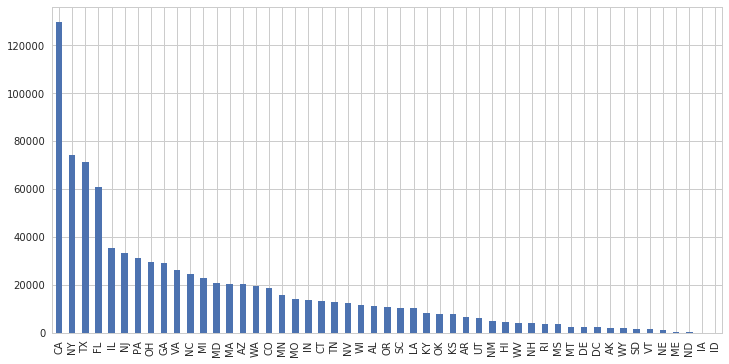

In [60]:
df_loan['addr_state'].sort_values().value_counts().plot(kind='bar', figsize=(12,6))

In [47]:
df_loan['addr_state'].describe()

count     887379
unique    51    
top       CA    
freq      129517
Name: addr_state, dtype: object

Mostly from California and NY, Texas, Florida and then kinda drops off. No missing values

#### What about the utilization? 

In [67]:
np.count_nonzero(df_loan['all_util'].isnull())

866007

In [68]:
df_loan['all_util'].describe()

count    21372.000000
mean     60.831939   
std      20.013254   
min      0.000000    
25%      47.700000   
50%      61.900000   
75%      75.200000   
max      151.400000  
Name: all_util, dtype: float64

A lot of missing values here - only 21372 out of 887379 are available. Might need to drop this column from any modeling problems.

In [36]:
sns.distplot??

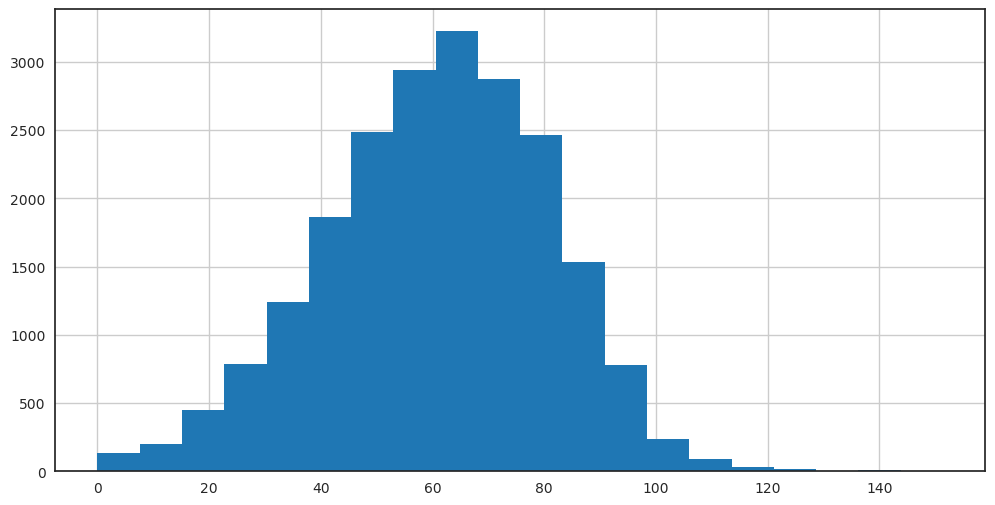

In [40]:
df_loan['all_util'].hist(bins=20)

#### Annual income

In [31]:
get_col_info(data=df_loan['annual_inc'])

count    8.87375e+05
mean     7.50276e+04
std      6.46983e+04
min      0.00000e+00
25%      4.50000e+04
50%      6.50000e+04
75%      9.00000e+04
max      9.50000e+06
Name: annual_inc, dtype: float64
Total Missing values = 4


Missing values?

In [28]:
np.count_nonzero(df_loan['annual_inc'].isnull())

4

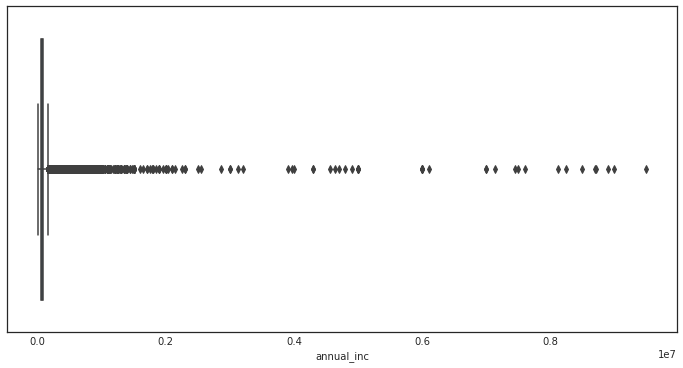

In [24]:
sns.boxplot(x=df_loan["annual_inc"].dropna())

Outliers - will need to transform this feature. 

#### Annual income joint

In [33]:
get_col_info(data=df_loan['annual_inc_joint'])

count    511.00000   
mean     109981.01159
std      52730.37985 
min      17950.00000 
25%      76032.50000 
50%      101771.00000
75%      132800.00000
max      500000.00000
Name: annual_inc_joint, dtype: float64
Total Missing values = 886868


Lots of missing values - most applicants are not applying together with someone else? 

#### Application type

In [34]:
get_col_info(df_loan['application_type'])

count     887379    
unique    2         
top       INDIVIDUAL
freq      886868    
Name: application_type, dtype: object
Total Missing values = 0


In [36]:
df_loan['application_type'].value_counts()

INDIVIDUAL    886868
JOINT         511   
Name: application_type, dtype: int64

As expected from joint income, only 511 applications are applying together

#### Delinquency 2 years

In [37]:
get_col_info(df_loan['delinq_2yrs'])

count    887350.00000
mean     0.31444     
std      0.86224     
min      0.00000     
25%      0.00000     
50%      0.00000     
75%      0.00000     
max      39.00000    
Name: delinq_2yrs, dtype: float64
Total Missing values = 29


If I am trying to predict interest/default status - can I use this? 

#### Scatterplots

In [ ]:
pd.scatter_matrix(df_loan,diagonal='hist')

### Check out how many members are in common between 2007-2015 and 2016 Q1

In [46]:
df_2016_q1 = pd.read_csv('../data/LoanStats_2016Q1.csv',low_memory=False)

Index(['Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)'], dtype='object')

In [ ]:
df_2016_q1[df_2016_q1['']]

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,18,46,54,111,122,123,124,127,128,129,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util',
       'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util',
       ...
       'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
       'total_rev_hi_lim', 'verification_status', 'verification_status_joint',
       'zip_code'],
      dtype='object', length=136)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524098 entries, 0 to 1524097
Data columns (total 136 columns):
id                                            21 non-null object
member_id                                     0 non-null float64
loan_amnt                                     1524077 non-null float64
funded_amnt                                   1524077 non-null float64
funded_amnt_inv                               1524077 non-null float64
term                                          1524077 non-null object
int_rate                                      1524077 non-null float64
installment                                   1524077 non-null float64
grade                                         1524077 non-null object
sub_grade                                     1524077 non-null object
emp_title                                     1430443 non-null object
emp_length                                    1524077 non-null object
home_ownership                                15240